In [2]:
from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date
import numpy as np
import pandas as pd
from pandas import DataFrame

def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2.)*T)/(sigma*sqrt(T))

def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)

In [3]:
def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))
  
def bs_put(S,K,T,r,sigma):
    return K*exp(-r*T)-S+bs_call(S,K,T,r,sigma)

In [141]:
import math
def get_estimator(price_data, window=30, trading_periods=252, clean=True):

    rs = (1.0 / (4.0 * math.log(2.0))) * ((price_data['High'] / price_data['Low']).apply(np.log))**2.0

    def f(v):
        return (trading_periods * v.mean())**0.5
    
    result = rs.rolling(
        window=window,
        center=False
    ).apply(func=f)
    
    if clean:
        return result.dropna()
    else:
        return result

[*********************100%***********************]  1 of 1 completed


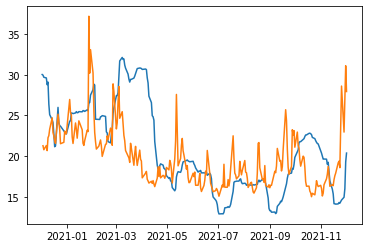

In [173]:
import matplotlib.pyplot as plt

vix = yf.download('^VIX', auto_adjust = True)[-252:]
plt.plot(df.park *200)
plt.plot(vix.Close)

In [149]:
import yfinance as yf

spy = yf.Ticker('SPY')
df = yf.download('SPY', auto_adjust = True)
df['ret'] = df.Close.pct_change()
df['park'] = get_estimator(df)[-253:]
df.dropna(inplace = True)
price = df['Close'][-1]
sigma = np.sqrt(252) * df.ret.std()
#sigma = df['park'][-1]
tnx = yf.download('^TNX', start = date.today())['Adj Close'].item() / 100
expiry = spy.options[10]
t = (pd.to_datetime(expiry) - pd.to_datetime(date.today())).days / 365
calls = spy.option_chain(expiry)[0]
puts = spy.option_chain(expiry)[1]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [157]:
option = 10
bs_call(price, calls.strike[option], t, tnx, sigma)

11.926012996921827

In [159]:
def call_implied_volatility(Price, S, K, T, r):
    sigma = 0.001
    while sigma < 1:
        Price_implied = S * \
            norm.cdf(d1(S, K, T, r, sigma))-K*exp(-r*T) * \
            norm.cdf(d2(S, K, T, r, sigma))
        if Price-(Price_implied) < 0.001:
            return sigma
        sigma += 0.001
    return "Not Found"

In [160]:
call_implied_volatility(calls.lastPrice[option], price, calls.strike[option], t, tnx)

0.22400000000000017

In [161]:
calls.loc[15]

contractSymbol        SPY211227C00458000
lastTradeDate        2021-12-02 20:45:41
strike                               458
lastPrice                           9.16
bid                                    0
ask                                    0
change                                 0
percentChange                          0
volume                               125
openInterest                        1061
impliedVolatility             0.00196311
inTheMoney                         False
contractSize                     REGULAR
currency                             USD
Name: 15, dtype: object

In [131]:
def call_delta(S,K,T,r,sigma):
    return norm.cdf(d1(S,K,T,r,sigma))

def call_gamma(S,K,T,r,sigma):
    return norm.pdf(d1(S,K,T,r,sigma))/(S*sigma*sqrt(T))

def call_vega(S,K,T,r,sigma):
    return 0.01*(S*norm.pdf(d1(S,K,T,r,sigma))*sqrt(T))

def call_theta(S,K,T,r,sigma):
    return 0.01*(-(S*norm.pdf(d1(S,K,T,r,sigma))*sigma)/(2*sqrt(T)) - r*K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma)))

def call_rho(S,K,T,r,sigma):
    return 0.01*(K*T*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma)))

In [136]:
call_theta(price, calls.strike[option], t, tnx, sigma)

-0.23740017872281335

In [155]:
calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPY211227C00375000,2021-11-26 15:04:40,375.0,86.54,0.0,0.0,0.0,0.0,1.0,1,0.000010,True,REGULAR,USD
1,SPY211227C00420000,2021-11-29 20:55:49,420.0,46.58,0.0,0.0,0.0,0.0,4.0,23,0.000010,True,REGULAR,USD
2,SPY211227C00425000,2021-11-30 14:30:01,425.0,37.38,0.0,0.0,0.0,0.0,1.0,6,0.000010,True,REGULAR,USD
3,SPY211227C00430000,2021-11-30 14:41:32,430.0,35.02,0.0,0.0,0.0,0.0,8.0,13,0.000010,True,REGULAR,USD
4,SPY211227C00435000,2021-11-29 19:16:28,435.0,33.19,0.0,0.0,0.0,0.0,8.0,10,0.000010,True,REGULAR,USD
5,SPY211227C00438000,2021-12-01 16:01:28,438.0,28.02,0.0,0.0,0.0,0.0,2.0,3,0.000010,True,REGULAR,USD
6,SPY211227C00440000,2021-11-29 19:16:28,440.0,28.63,0.0,0.0,0.0,0.0,4.0,6,0.000010,True,REGULAR,USD
7,SPY211227C00442000,2021-11-30 16:45:48,442.0,20.35,0.0,0.0,0.0,0.0,6.0,6,0.000010,True,REGULAR,USD
8,SPY211227C00444000,2021-11-26 16:42:32,444.0,21.09,0.0,0.0,0.0,0.0,1.0,1,0.000010,True,REGULAR,USD
9,SPY211227C00445000,2021-12-02 16:32:06,445.0,16.78,0.0,0.0,0.0,0.0,51.0,104,0.000010,True,REGULAR,USD
